<a href="https://colab.research.google.com/github/aishv94/Data-Science-Projects/blob/main/Electrical_Fault_detection_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electrical Fault detection

We have to predict faults in a power system.

# Dataset Desciption

The dataset contains one file 

detect_dataset.csv

shape of the dataset is (12001, 9)

# Columns in dataset

there are seven columns

'Output (S)',

'Ia',

'Ib',

'Ic',

'Va', 

'Vb', 

'Vc', 

'Unnamed: 7',

'Unnamed: 8'

Outputs - 0 (No-fault) or 1(Fault is present)

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
%matplotlib inline


In [3]:
# Read csv file using pandas
data = pd.read_csv("/content/detect_dataset.csv")

In [4]:
data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


# basic EDA

In [5]:
#check shape of the dataset
print(data.shape)

(12001, 9)


In [6]:
# check columns of dataset
print(data.columns)

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')


In [7]:
# check length of dataset
len(data)

12001

In [8]:
# Check which columns are having categorical, numerical or boolean values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [9]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
data.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


In [10]:
# Check for missing values in all the columnns of the dataset
data.isna().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [11]:
# loop through datatset to find count of unique values of each column

n = data.nunique(axis=0)
  
print("No.of.unique values in each column :\n",
      n)

No.of.unique values in each column :
 Output (S)        2
Ia            12001
Ib            12001
Ic            12001
Va            11996
Vb            11813
Vc            11987
Unnamed: 7        0
Unnamed: 8        0
dtype: int64


In [12]:
# drop 'Unnamed: 7','Unnamed: 8'
data = data.drop(data[['Unnamed: 7', 'Unnamed: 8']],axis=1)
data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [13]:
print(data.iloc[:2])

   Output (S)          Ia        Ib          Ic       Va        Vb        Vc
0           0 -170.472196  9.219613  161.252583  0.05449 -0.659921  0.605431
1           0 -122.235754  6.168667  116.067087  0.10200 -0.628612  0.526202


In [14]:
# check total number of fault and no-fault instances
print(data['Output (S)'].value_counts(),"\n")



0    6505
1    5496
Name: Output (S), dtype: int64 



In [15]:
#check duplicates if any
print(f"Dataset Detect has {data.duplicated().sum()} duplicate values.")

Dataset Detect has 0 duplicate values.


# Correlation Matrix

In [16]:
# import pandas
import pandas as pd
 
# obtaining the data
data
# creation of DataFrame
data = pd.DataFrame(data)
 
# creation of correlation matrix
corrM = data.corr()
 
corrM


,Output (S),Ia,Ib,Ic,Va,Vb,Vc
Output (S),1.000000,0.039408,-0.134028,0.120044,-0.035377,0.012206,0.022570
Ia,0.039408,1.000000,-0.375477,-0.275694,0.032598,-0.158207,0.129686
Ib,-0.134028,-0.375477,1.000000,-0.530187,-0.027052,0.032248,-0.006205
Ic,0.120044,-0.275694,-0.530187,1.000000,-0.001813,-0.096194,0.100298
Va,-0.035377,0.032598,-0.027052,-0.001813,1.000000,-0.507928,-0.471163
Vb,0.012206,-0.158207,0.032248,-0.096194,-0.507928,1.000000,-0.520478
Vc,0.022570,0.129686,-0.006205,0.100298,-0.471163,-0.520478,1.000000


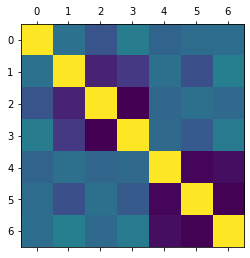

In [17]:
plt.matshow(data.corr())
plt.show()

# Histogram

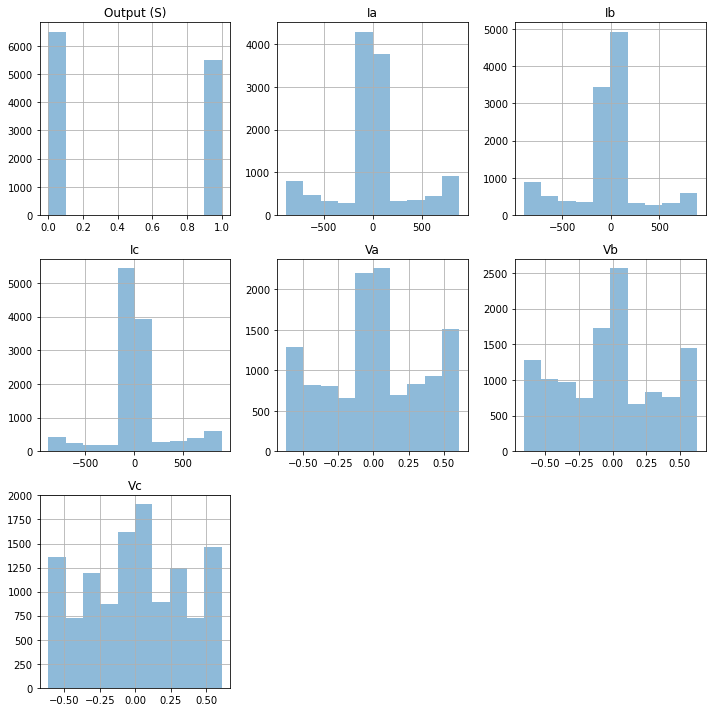

In [18]:
# Histogram using pandas 
data.hist(alpha=0.5, figsize=(10, 10))
plt.tight_layout()
plt.show()


### Count plot

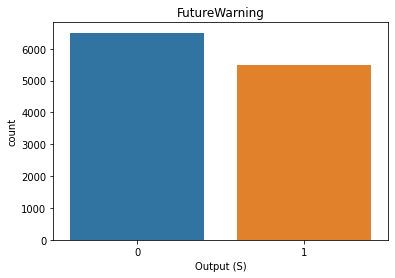

In [19]:
# count plot of Output (S) column
sns.countplot(x=data['Output (S)']).set(
    title="FutureWarning")
plt.show()

# Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76c3555430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76c3555af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76c35550d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76c34e21f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76c34e24f0>],
 'means': []}

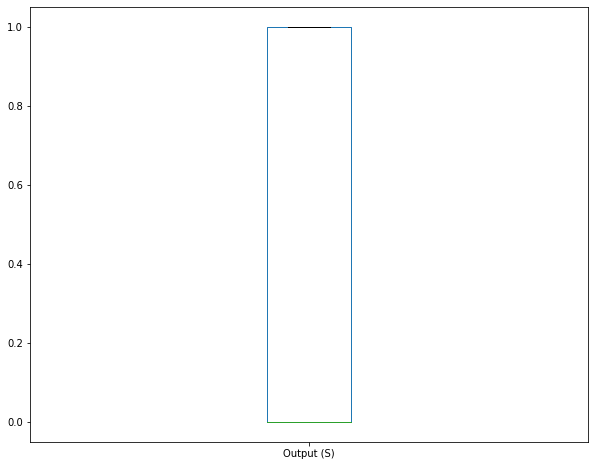

In [20]:
# box plot using pandas 
# box plot for Output(S) column 
plt.figure(figsize=(10, 8))
bp=data.boxplot(column='Output (S)',grid=False,return_type='dict')
bp

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76c34addf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76c34994f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76c34ada90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76c3499bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76c3499eb0>],
 'means': []}

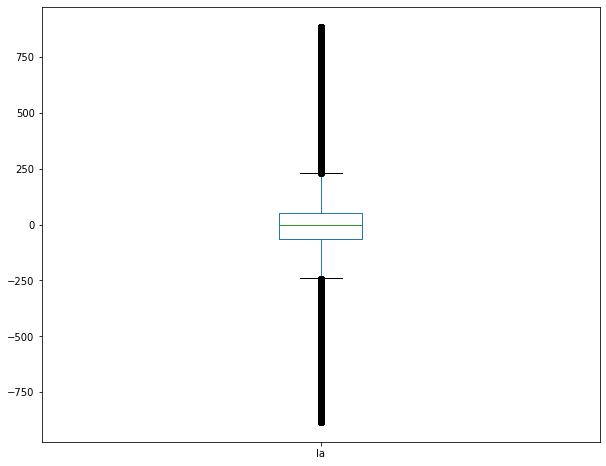

In [21]:
# box plot using pandas 
# box plot for Ia column 
plt.figure(figsize=(10, 8))
bp=data.boxplot(column='Ia',grid=False,return_type='dict')
bp


{'whiskers': [<matplotlib.lines.Line2D at 0x7f76c342fe50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76c3413550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76c342faf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76c3413c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76c3413f10>],
 'means': []}

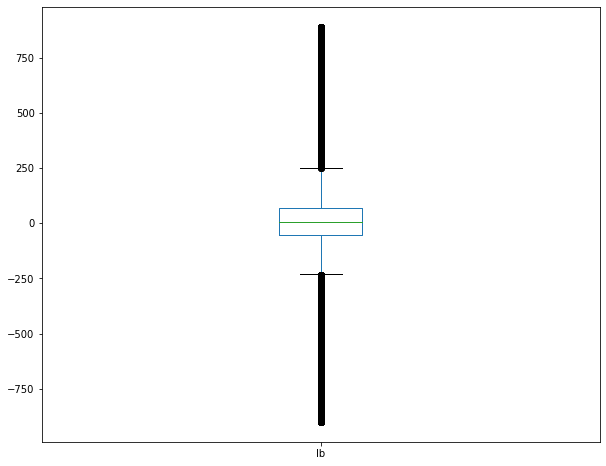

In [22]:
# box plot using pandas 
# box plot for Ib column 
plt.figure(figsize=(10, 8))
bp=data.boxplot(column='Ib',grid=False,return_type='dict')
bp


{'whiskers': [<matplotlib.lines.Line2D at 0x7f76c34c3430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76c3509a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76c34c3c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76c343d130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76c357e970>],
 'means': []}

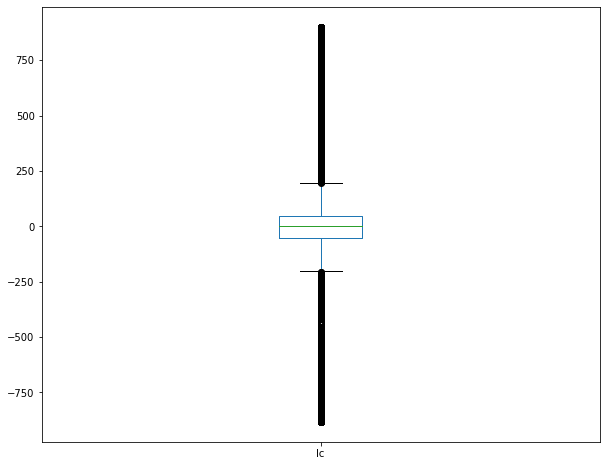

In [23]:
# box plot using pandas 
# box plot for Ic column 
plt.figure(figsize=(10, 8))
bp=data.boxplot(column='Ic',grid=False,return_type='dict')
bp


{'whiskers': [<matplotlib.lines.Line2D at 0x7f76c35666d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76c5ff0e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76c35661f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76c5ff0a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76c605a730>],
 'means': []}

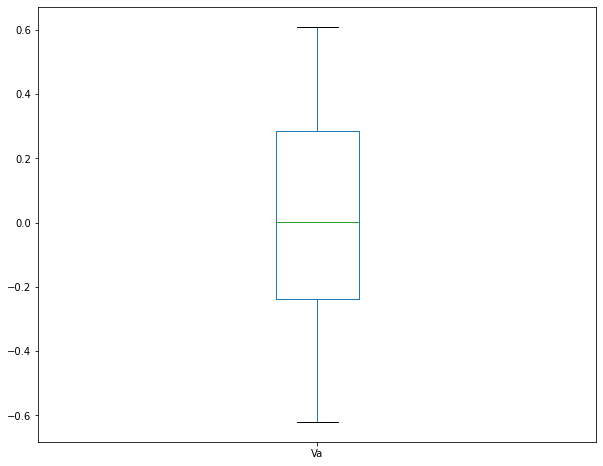

In [24]:
# box plot using pandas 
# box plot for Va column 

plt.figure(figsize=(10, 8))
bp=data.boxplot(column='Va',grid=False,return_type='dict')
bp

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76c35c9d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76c35c9ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76c35cd3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76c35a5310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76c35a5be0>],
 'means': []}

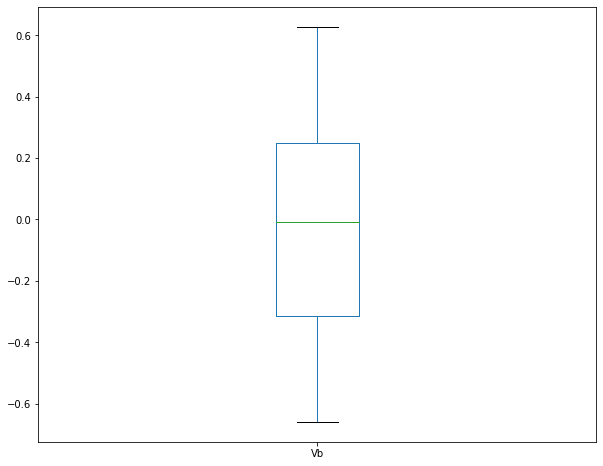

In [25]:
# box plot using pandas 
# box plot for Vb column 

plt.figure(figsize=(10, 8))
bp=data.boxplot(column='Vb',grid=False,return_type='dict')
bp

{'whiskers': [<matplotlib.lines.Line2D at 0x7f76c5e6b8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f76c5e6bc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f76c5e6b400>],
 'medians': [<matplotlib.lines.Line2D at 0x7f76c5f7ac40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f76c5f7a580>],
 'means': []}

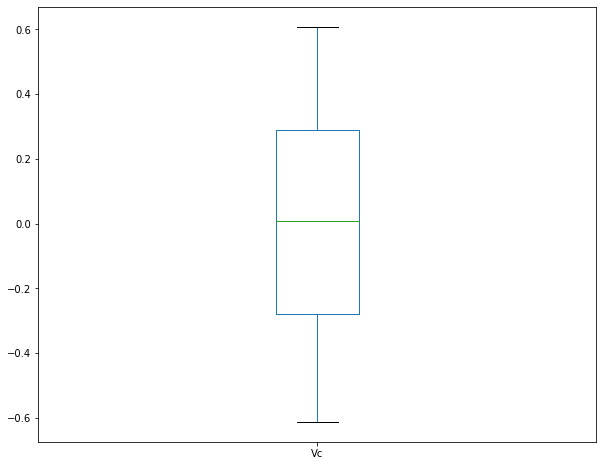

In [26]:
# box plot using pandas 
# box plot for Vc column 

plt.figure(figsize=(10, 8))
bp=data.boxplot(column='Vc',grid=False,return_type='dict')
bp

Dataset is balanced and not skewed in nature

# Dendrogram

In [27]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values
import numpy as np
from pandas import *
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
df = data.dropna()

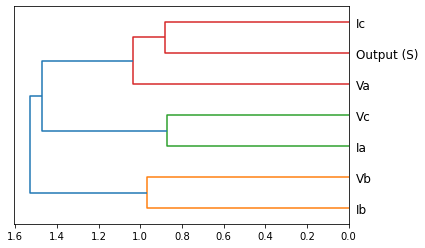

In [28]:
X=df.transpose()
Y=pdist(X) # computing the distance
C=linkage(X,  metric='correlation', method='complete')# computing the linkage
B=dendrogram(C,labels=list(df.columns),orientation='left')

Classification being observed with correlation between independant and dependant variables

# **Feature** **Engineering**

In [29]:
data.isna().sum()

Output (S)    0
Ia            0
Ib            0
Ic            0
Va            0
Vb            0
Vc            0
dtype: int64

Since there are no missing values, all values are standardised and there are no categorical varibales, no further feature engineering is required

# Pair Plot

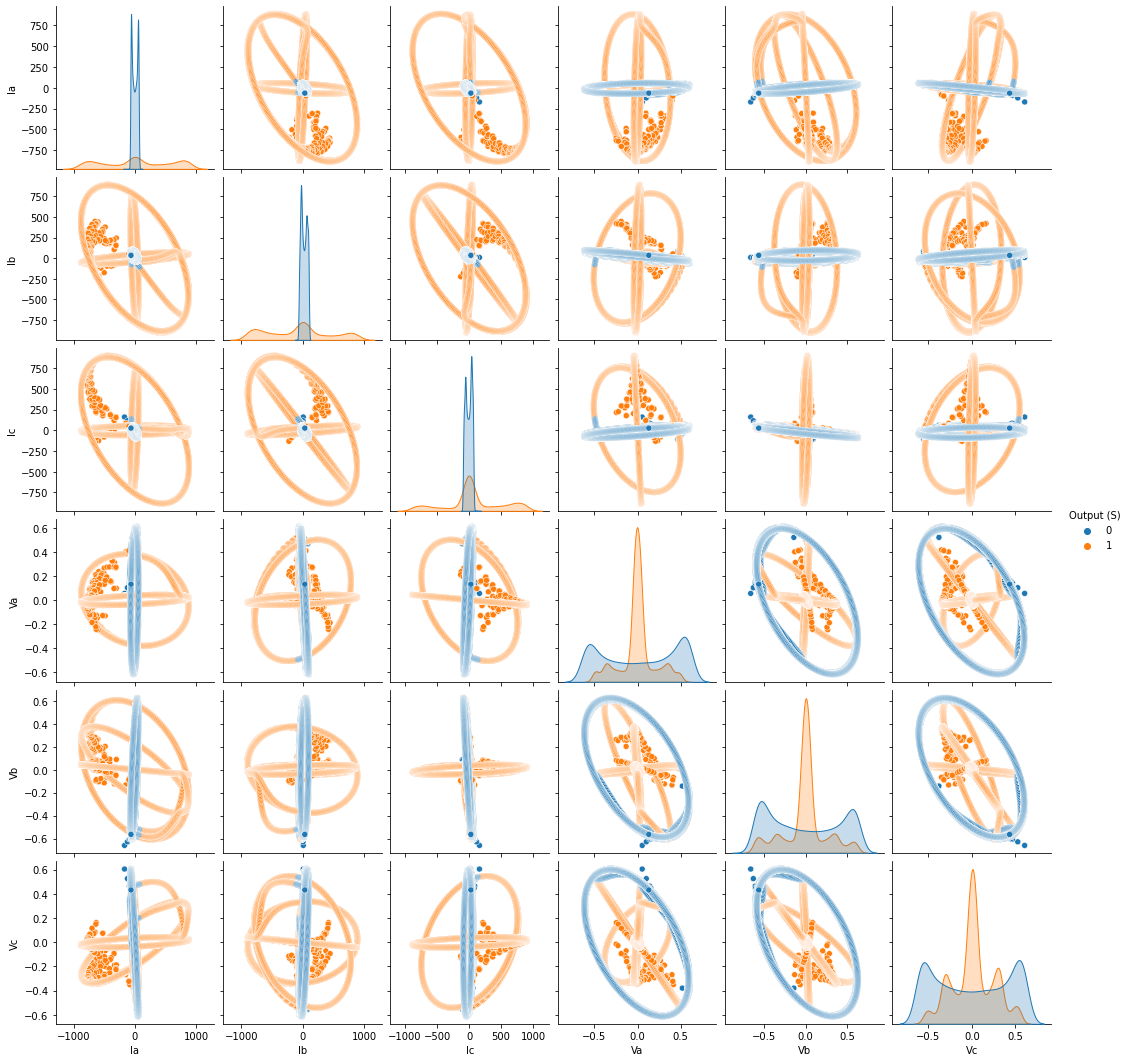

In [30]:
sns.pairplot(data,hue='Output (S)')
plt.show()

# Preprocessing, Modeling and prediction on test data

In [31]:
## Split the labels and the target
target=data.iloc[:,-7]

#check the shape
target.shape


(12001,)

In [32]:
feature=data.iloc[:,1:7]
feature
#check the shape
feature.shape

(12001, 6)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import metrics

In [34]:
# import train test split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, 
                                                    random_state=101)


# check shape of X_train and y_train
print('X_train : ')
print(X_train.head())

X_train : 
               Ia          Ib          Ic        Va        Vb        Vc
6956  -854.296355  235.127541  621.266660 -0.028496  0.041419 -0.012924
3641    -5.132427  -52.679987   51.028840  0.381065 -0.569439  0.188374
10319  -52.326728   97.153494  -48.197068 -0.534544  0.012186  0.522358
11225  -50.189269   12.259478   34.840525  0.345040 -0.583160  0.238120
11569  -71.330780   64.855513    3.486460 -0.160984 -0.416025  0.577009


In [35]:
print(X_train.shape)
print('')

(9600, 6)



In [36]:
print('X_test : ')
print(X_test.head())

X_test : 
               Ia          Ib          Ic        Va        Vb        Vc
11627  -48.364562    9.151967   36.240401  0.360711 -0.581525  0.220815
7377  -736.078299  -53.469120  791.562083 -0.037117  0.036278  0.000839
6280   -14.708125   77.073523  -60.126685 -0.611957  0.350340  0.261617
6798   540.194107  336.737591 -874.801757  0.041735 -0.027198 -0.014536
7259  -262.076786  862.488679 -598.374253  0.029957  0.010954 -0.040911


In [37]:
print(X_test.shape)

(2401, 6)


In [38]:
print('')
print('y_train : ')
print(y_train.head())


y_train : 
6956     1
3641     0
10319    0
11225    0
11569    0
Name: Output (S), dtype: int64


In [39]:
print(y_train.shape)
print('')
print('y_test : ')

(9600,)

y_test : 


In [40]:
print(y_test.head())

11627    0
7377     1
6280     0
6798     1
7259     1
Name: Output (S), dtype: int64


In [41]:
print(y_test.shape)

(2401,)


Scaling

In [42]:
#import min max scalar
from sklearn.preprocessing import MinMaxScaler
 
# compute required values
scaler =MinMaxScaler()
model = scaler.fit(data)
scaled_data = model.transform(data)
 
# print scaled data
print(scaled_data)

[[0.         0.40302822 0.50812594 ... 0.54870115 0.         0.99769698]
 [0.         0.43029152 0.50642188 ... 0.58730797 0.02431238 0.93280554]
 [0.         0.44841995 0.50510651 ... 0.61902027 0.04243225 0.88206623]
 ...
 [0.         0.46238877 0.5233474  ... 0.59633322 0.07897992 0.86638422]
 [0.         0.4626245  0.52279168 ... 0.60388848 0.076741   0.86113068]
 [0.         0.46286823 0.52223521 ... 0.61141677 0.074613   0.85578733]]


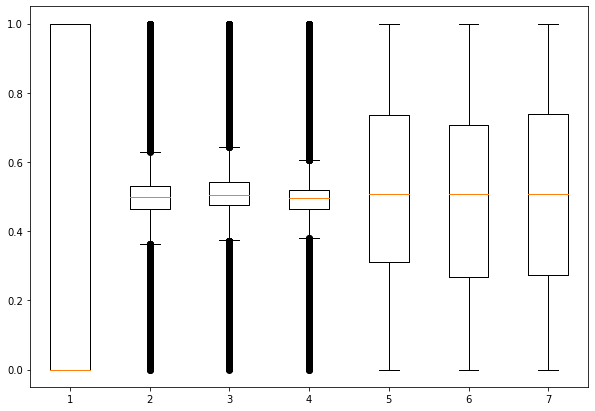

In [43]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(scaled_data)
plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(df)
print(sc_X)

[[-0.91917819 -0.46979973  0.10009242 ...  0.12701278 -1.80193373
   1.71922075]
 [-0.91917819 -0.34190004  0.09155696 ...  0.26424305 -1.71438652
   1.49236984]
 [-0.91917819 -0.25685457  0.08496841 ...  0.37696635 -1.64913814
   1.31499272]
 ...
 [-0.91917819 -0.19132295  0.17633503 ...  0.29632386 -1.51753252
   1.26017073]
 [-0.91917819 -0.1902171   0.17355147 ...  0.3231795  -1.52559472
   1.24180512]
 [-0.91917819 -0.18907368  0.1707642  ...  0.34993927 -1.53325752
   1.22312557]]


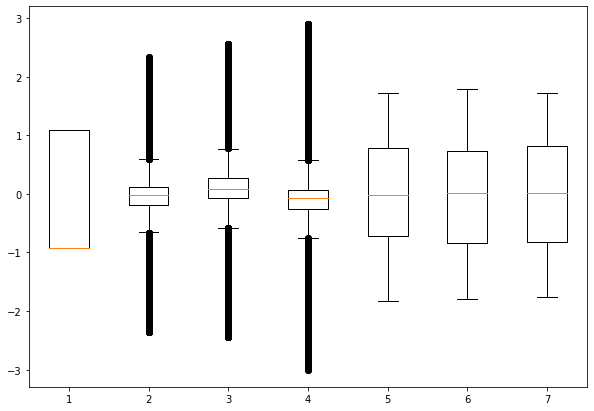

In [45]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(sc_X)
plt.show()

In [46]:
clf = DecisionTreeClassifier(random_state=101)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
y_train_acc = accuracy_score(y_train,y_train_pred)
y_test_acc = accuracy_score(y_test,y_test_pred)

In [48]:
print("Train Accuracy: ", y_train_acc)
print("Test Accuracy: ", y_test_acc)

Train Accuracy:  1.0
Test Accuracy:  0.9962515618492295


Train accuracy is 100% thus we see there is overfitting and it needs hyperparameter tuning.

## LogisticRegression

In [51]:
%%time
# Fit a logistic Regression model to the train dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Import logisticRegressor
from random import randrange
import warnings
warnings.filterwarnings("ignore")
# Instantiate the model
print(data.isnull().any().sum())

0
CPU times: user 3.05 ms, sys: 0 ns, total: 3.05 ms
Wall time: 3.81 ms


In [52]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, 
                                                    random_state=101)


In [53]:
X_train

,Ia,Ib,Ic,Va,Vb,Vc
6956,-854.296355,235.127541,621.266660,-0.028496,0.041419,-0.012924
3641,-5.132427,-52.679987,51.028840,0.381065,-0.569439,0.188374
10319,-52.326728,97.153494,-48.197068,-0.534544,0.012186,0.522358
11225,-50.189269,12.259478,34.840525,0.345040,-0.583160,0.238120
11569,-71.330780,64.855513,3.486460,-0.160984,-0.416025,0.577009
...,...,...,...,...,...,...
599,-494.988193,4.450447,-42.239979,-0.263203,0.578902,-0.315699
5695,17.136070,-44.346340,29.578071,0.589952,-0.205346,-0.384606
8006,-60.046818,27.337666,34.604604,0.187336,-0.578972,0.391636
1361,-833.020757,-34.699150,-17.418075,-0.063376,0.378238,-0.314862


In [54]:
X_train.shape

(9600, 6)

In [55]:
X_test

,Ia,Ib,Ic,Va,Vb,Vc
11627,-48.364562,9.151967,36.240401,0.360711,-0.581525,0.220815
7377,-736.078299,-53.469120,791.562083,-0.037117,0.036278,0.000839
6280,-14.708125,77.073523,-60.126685,-0.611957,0.350340,0.261617
6798,540.194107,336.737591,-874.801757,0.041735,-0.027198,-0.014536
7259,-262.076786,862.488679,-598.374253,0.029957,0.010954,-0.040911
...,...,...,...,...,...,...
190,60.648595,-14.217032,-46.431563,-0.049957,0.547892,-0.497936
5861,3.912297,68.238155,-69.819758,-0.572287,0.482858,0.089429
10639,21.929812,67.126979,-92.325026,-0.469884,0.593793,-0.123909
4831,-44.036874,781.012071,-734.378995,0.105836,-0.007537,-0.098299


In [56]:
y_train

6956     1
3641     0
10319    0
11225    0
11569    0
        ..
599      1
5695     0
8006     0
1361     1
1547     1
Name: Output (S), Length: 9600, dtype: int64

In [57]:
y_test

11627    0
7377     1
6280     0
6798     1
7259     1
        ..
190      0
5861     0
10639    0
4831     1
831      1
Name: Output (S), Length: 2401, dtype: int64

In [58]:
logistic_model = LogisticRegression().fit(X_train,y_train)

In [59]:
ypredicted = logistic_model.predict(X_test)

In [60]:
ypredicted

array([0, 1, 0, ..., 0, 0, 0])

In [61]:
print("Confusion Matrix")
matrix = confusion_matrix(y_test,ypredicted)
print(matrix)

Confusion Matrix
[[1308    0]
 [ 677  416]]


In [62]:
print("\nClassification Report")
report = classification_report(y_test,ypredicted)
print(report)


Classification Report
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      1308
           1       1.00      0.38      0.55      1093

    accuracy                           0.72      2401
   macro avg       0.83      0.69      0.67      2401
weighted avg       0.81      0.72      0.68      2401



In [63]:
lr_accuracy = accuracy_score(y_test, ypredicted)
lr_accuracy
print('Logistic Regression Accuracy of Scikit Model: {:.2f}%'.format(lr_accuracy*100))

Logistic Regression Accuracy of Scikit Model: 71.80%


In [64]:
from sklearn.metrics import confusion_matrix

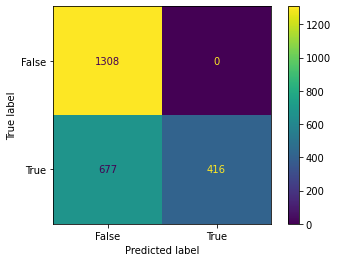

In [65]:
confusion_matrix = metrics.confusion_matrix(y_test, ypredicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

## RandomForestClassifier

In [66]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd



CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 14.3 µs


In [67]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

In [68]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL in Percent: ", metrics.accuracy_score(y_test, y_pred)*100)


ACCURACY OF THE MODEL in Percent:  99.66680549770929


In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
print("Confusion Matrix")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

Confusion Matrix
[[1307    1]
 [   7 1086]]


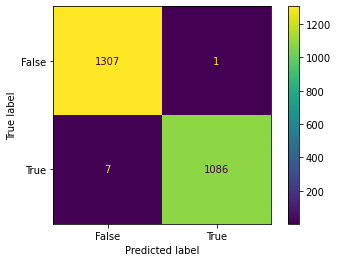

In [71]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

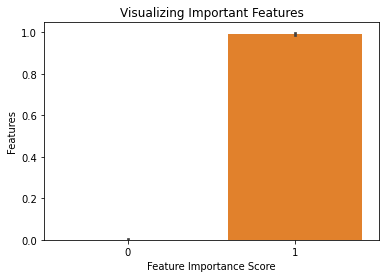

In [72]:
# Creating a seaborn bar plot
sns.barplot(y_test, y_pred)
# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')
# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

## DecisionTreeClassifier

In [73]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [74]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=5,min_samples_leaf=2)
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=100)

In [75]:
y_pred = Classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


In [76]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1308    0]
 [  25 1068]]


0.9895876718034152

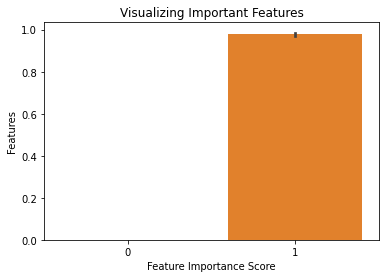

In [77]:
# Creating a seaborn bar plot
sns.barplot(y_test, y_pred)
# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')
# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

In [78]:
from sklearn import tree
from matplotlib import *

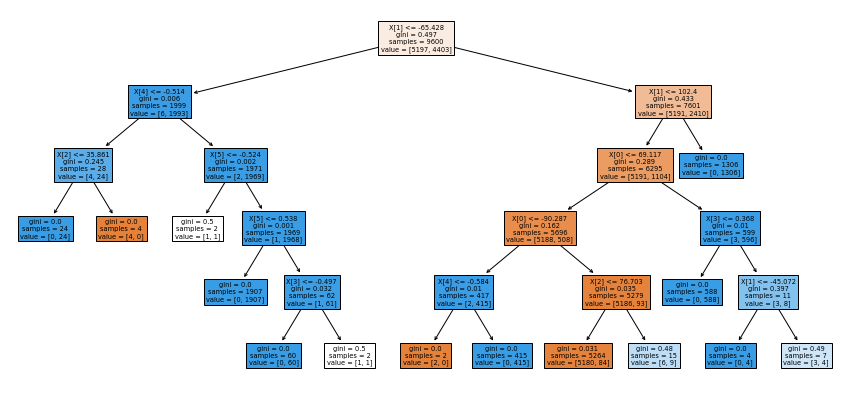

In [91]:
fig, ax = plt.subplots(figsize=(15, 7))
tree.plot_tree(Classifier,filled=True)
plt.show()

## GradientBoostingClassifier

In [80]:
from xgboost import XGBClassifier

In [81]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier()

In [82]:
# Accuracy of model

print("GBC accuracy is %2.2f" % accuracy_score( 
     y_test, xgb_clf.predict(X_test)))

GBC accuracy is 0.99


In [83]:
print(confusion_matrix(y_test, xgb_clf.predict(X_test)))

[[1308    0]
 [  13 1080]]


In [84]:
from sklearn.metrics import classification_report

pred=xgb_clf.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1308
           1       1.00      0.99      0.99      1093

    accuracy                           0.99      2401
   macro avg       1.00      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



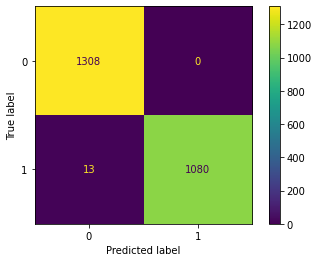

In [93]:
metrics.plot_confusion_matrix(xgb_clf,X_test,y_test)
plt.show()

#SVM model

Score: 0.9904183955739974


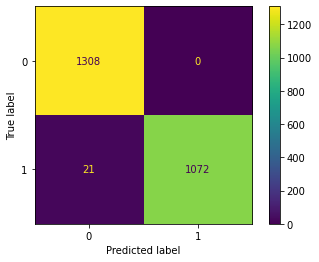

In [89]:
sv = SVC(C=1000)

sv.fit(X_train,y_train)
scores = cross_val_score(sv, X_test, y_test, cv=10)
print("Score:", np.mean(scores))
metrics.plot_confusion_matrix(sv,X_test,y_test)
plt.show()

# KNN Model

Value of hyperparameters has been evaluated using GridSearchCV

Score: 0.9904183955739974 



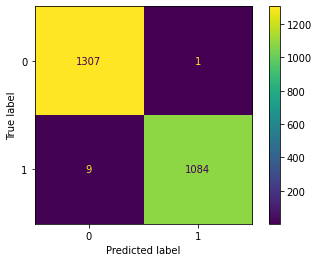

In [92]:
knn = KNeighborsClassifier(leaf_size= 1, n_neighbors= 5,p= 1)
knn.fit(X_train,y_train)
scores = cross_val_score(knn, X_test, y_test, cv=10)
print("Score:", np.mean(scores),"\n")
metrics.plot_confusion_matrix(knn,X_test,y_test)
plt.show()

## Hyper parameter tunning

In [85]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
  # Random search of parameters, using 3 fold cross validation, 
  # search across 20 different combinations, and use all available cores
  # Fit the random search model

In [86]:
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 20, step=5)) + [None],
              'n_estimators':np.arange(10, 20, step=5),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [87]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf,rs_space, n_iter=20, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)

In [88]:
# random random search results
print('Best random search hyperparameters are: '+str(model_random.best_params_))
print('Best random search score is: '+str(model_random.best_score_))

Best random search hyperparameters are: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 15}
Best random search score is: 0.9967708333333333


### working with best model

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.611


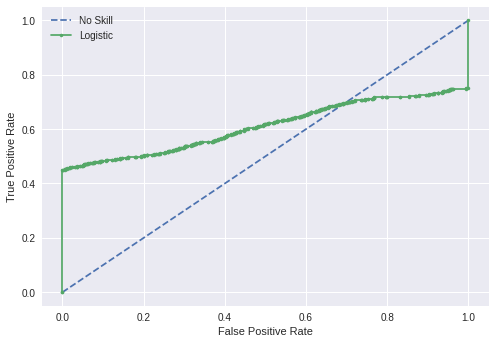

In [98]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Conclusion

According to this model, the predicted value we got, matches with the actual target values. The model is performing well. Hypertuning did to avoid overfitting.